In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv("/Users/ashwin/Desktop/data/csv/sales_by_class_day.csv")

In [4]:
df.head()

,index,Date,ClassCode,ClassName,1PAYZANTS-SACKVILLENetSales,2PAYZANTSBURNSIDENetSales,3PAYZANTNBNetSales,4PAYZANTS-PORTERSLAKENetSales,5PAYZANTS-ENFIELDNetSales
0,0,2014-01-02 00:00:00,NaN,BLANK,25.21,0.03,0.10,0.0,0.0
1,1,2014-01-02 00:00:00,001,SPRUCE LUMBER,2764.54,1577.13,68.88,0.0,0.0
2,2,2014-01-02 00:00:00,002,TREATED LUMBER,79.20,191.28,0.00,0.0,0.0
3,3,2014-01-02 00:00:00,003,PINE LUMBER,528.03,33.60,97.48,0.0,0.0
4,4,2014-01-02 00:00:00,004,ROOFING,-160.93,589.35,0.00,0.0,0.0


In [5]:
spruce = df.loc[df['ClassName'] == 'SPRUCE LUMBER']

In [6]:
spruce.head()

,index,Date,ClassCode,ClassName,1PAYZANTS-SACKVILLENetSales,2PAYZANTSBURNSIDENetSales,3PAYZANTNBNetSales,4PAYZANTS-PORTERSLAKENetSales,5PAYZANTS-ENFIELDNetSales
1,1,2014-01-02 00:00:00,001,SPRUCE LUMBER,2764.54,1577.13,68.88,0.0,0.0
70,70,2014-01-03 00:00:00,001,SPRUCE LUMBER,23.65,0.00,41.74,0.0,0.0
121,121,2014-01-04 00:00:00,001,SPRUCE LUMBER,85.25,23.85,27.70,0.0,0.0
186,186,2014-01-05 00:00:00,001,SPRUCE LUMBER,219.20,0.00,0.00,0.0,0.0
242,242,2014-01-06 00:00:00,001,SPRUCE LUMBER,1961.52,3442.56,350.05,0.0,0.0


In [7]:
spruce['Date'].min(), spruce['Date'].max()

('2014-01-02 00:00:00', '2018-12-31 00:00:00')

In [8]:
cols = ['index', 'ClassCode', 'ClassName']
spruce.drop(cols, axis=1, inplace=True)
spruce = spruce.sort_values('Date')
spruce.isnull().sum()

Date                             0
1PAYZANTS-SACKVILLENetSales      0
2PAYZANTSBURNSIDENetSales        0
3PAYZANTNBNetSales               0
4PAYZANTS-PORTERSLAKENetSales    0
5PAYZANTS-ENFIELDNetSales        0
dtype: int64

In [9]:
spruce['Date'] = pd.to_datetime(df['Date'])
spruce = spruce.set_index('Date')
spruce.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-11',
               ...
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1777, freq=None)

In [10]:
y1 = spruce['1PAYZANTS-SACKVILLENetSales'].resample('MS').mean()
y2 = spruce['2PAYZANTSBURNSIDENetSales'].resample('MS').mean()
y3 = spruce['3PAYZANTNBNetSales'].resample('MS').mean()
y4 = spruce['4PAYZANTS-PORTERSLAKENetSales'].resample('MS').mean()
y5 = spruce['5PAYZANTS-ENFIELDNetSales'].resample('MS').mean()

In [11]:
y1.head()

Date
2014-01-01    3678.319333
2014-02-01    5001.743214
2014-03-01    2822.845806
2014-04-01    4126.153929
2014-05-01    4397.447097
Freq: MS, Name: 1PAYZANTS-SACKVILLENetSales, dtype: float64

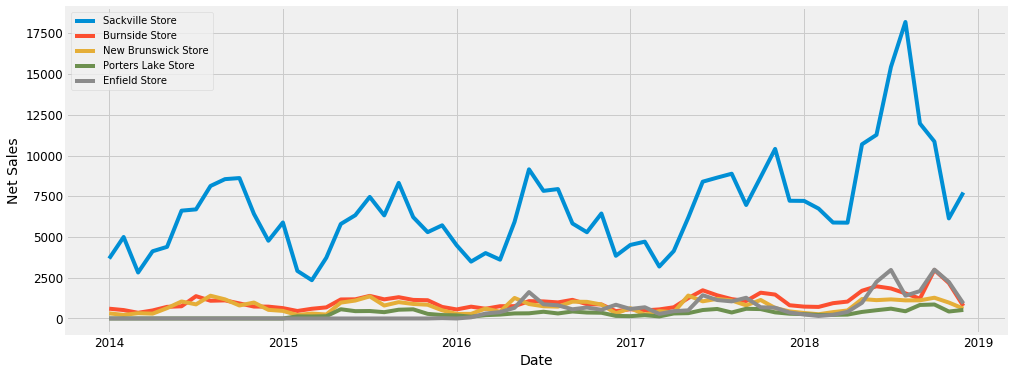

In [25]:
y1.plot(figsize=(15, 6), label="Sackville Store")
y2.plot(figsize=(15, 6), label="Burnside Store")
y3.plot(figsize=(15, 6), label="New Brunswick Store")
y4.plot(figsize=(15, 6), label="Porters Lake Store")
y5.plot(figsize=(15, 6), label="Enfield Store")
plt.legend()
plt.ylabel("Net Sales")
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

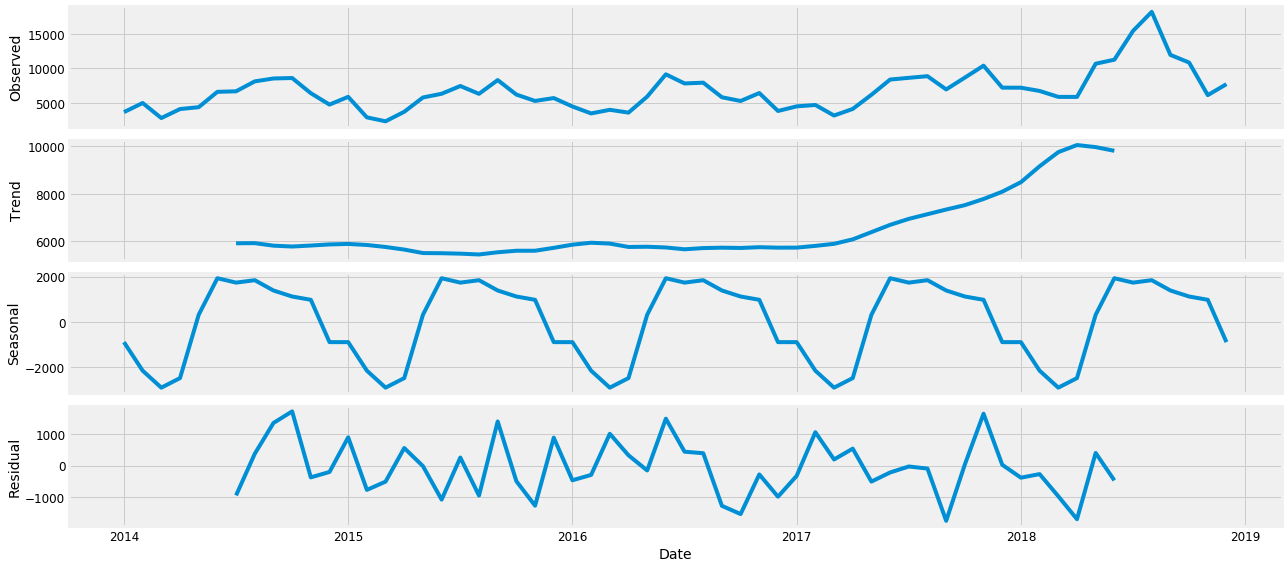

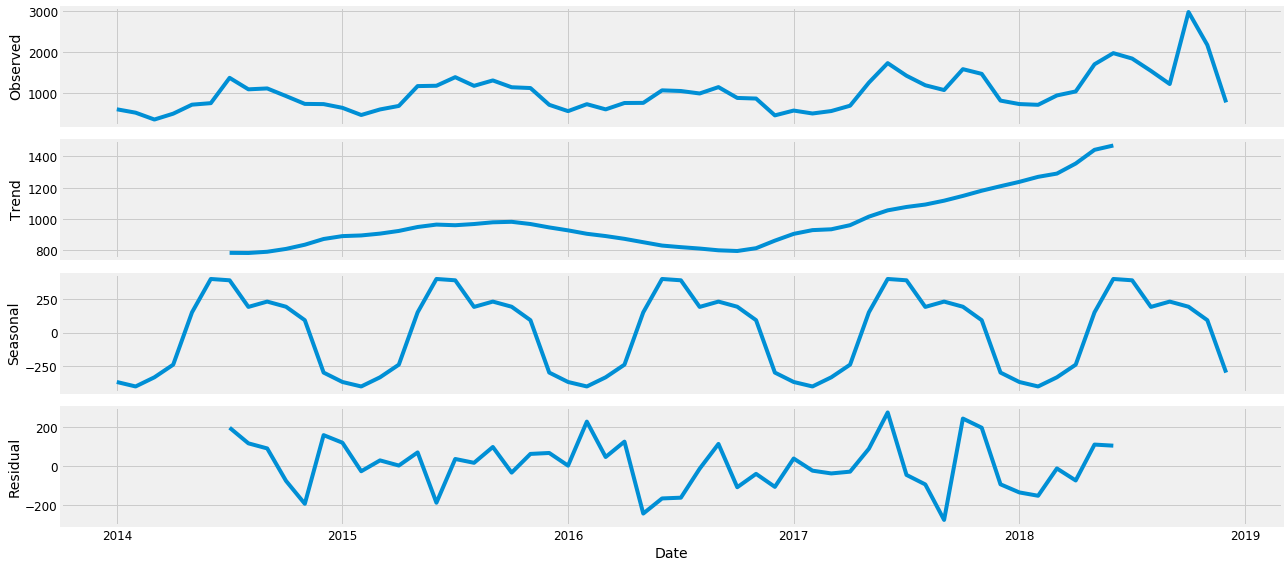

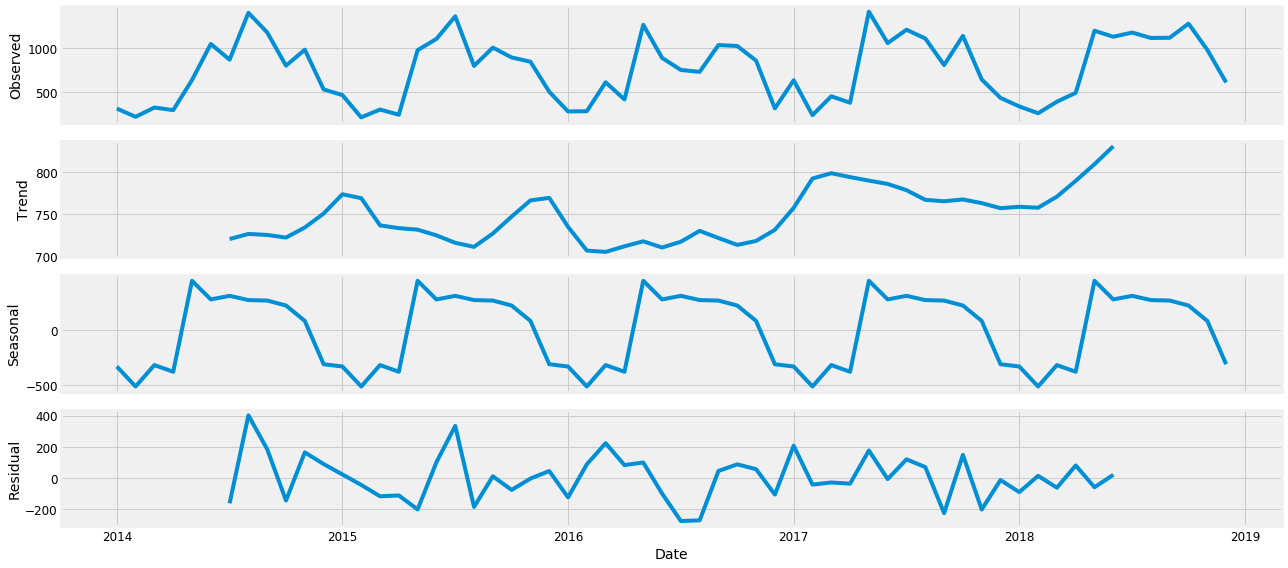

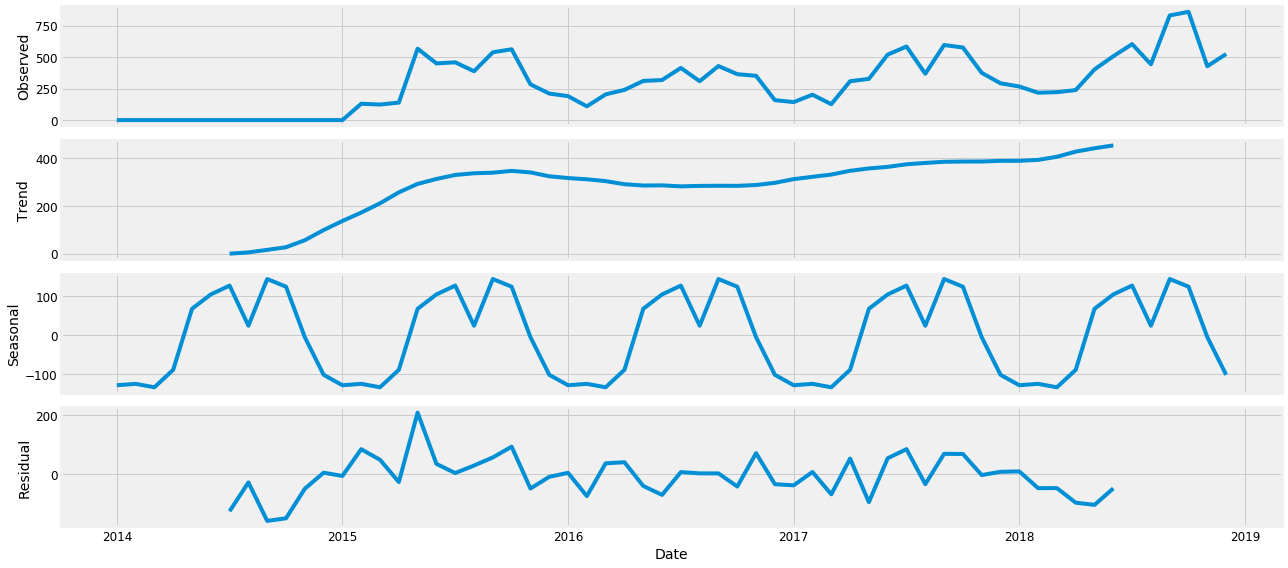

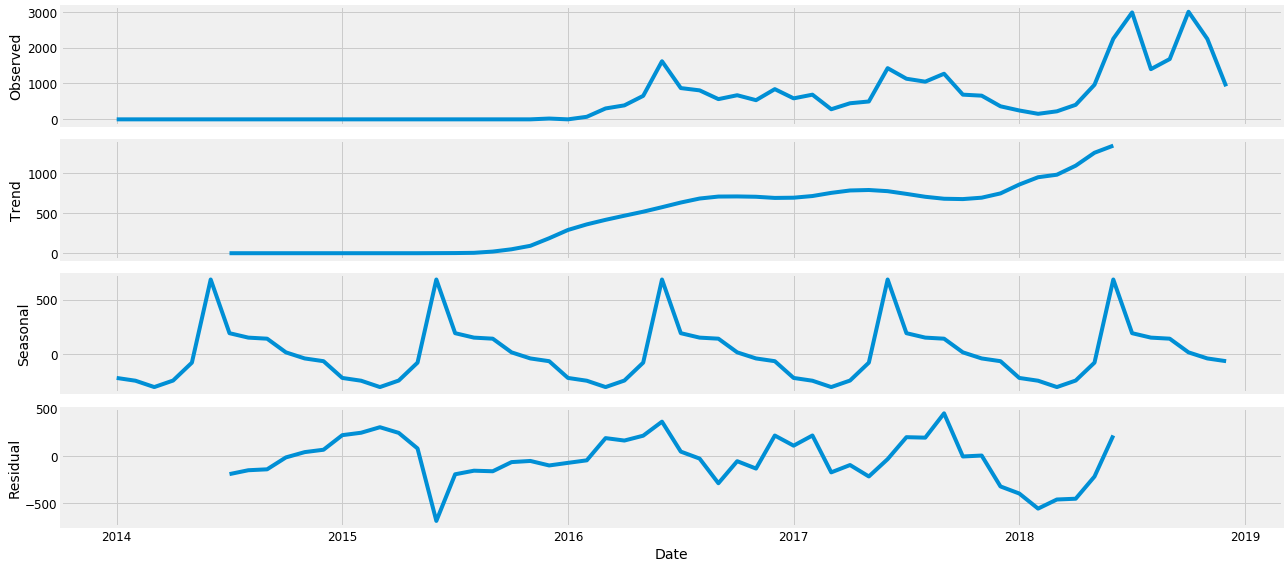

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition1 = sm.tsa.seasonal_decompose(y1, model='additive')
decomposition2 = sm.tsa.seasonal_decompose(y2, model='additive')
decomposition3 = sm.tsa.seasonal_decompose(y3, model='additive')
decomposition4 = sm.tsa.seasonal_decompose(y4, model='additive')
decomposition5 = sm.tsa.seasonal_decompose(y5, model='additive')



fig1 = decomposition1.plot()
fig2 = decomposition2.plot()
fig3 = decomposition3.plot()
fig4 = decomposition4.plot()
fig5 = decomposition5.plot()
plt.show()

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

In [14]:
mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4854      0.249      1.947      0.052      -0.003       0.974
ma.L1         -0.9049      0.127     -7.120      0.000      -1.154      -0.656
ar.S.L12      -0.3848      0.507     -0.758      0.448      -1.379       0.610
sigma2      4.749e+06   1.19e+06      3.979      0.000    2.41e+06    7.09e+06


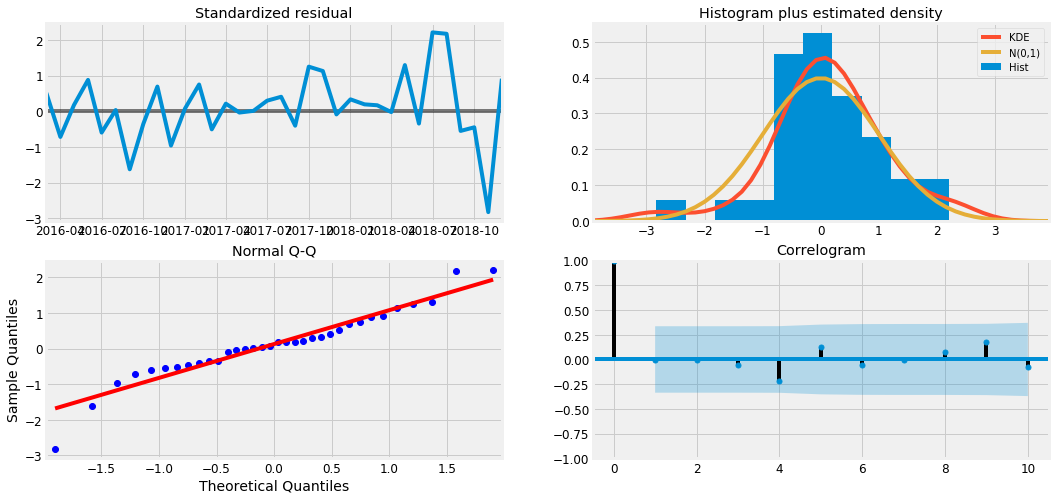

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

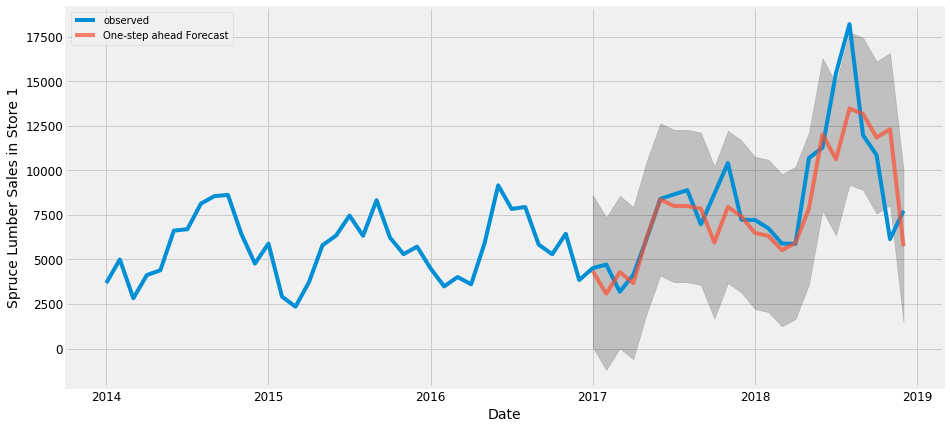

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y1['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Spruce Lumber Sales in Store 1')
plt.legend()
plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = y1['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 4968470.56


In [ ]:
data = pd.read_csv('/Users/ashwin/Desktop/data/csv/tbl_sales_by_day.csv')

In [ ]:
data.head()

In [ ]:
net = data['1PAYZANTS-SACKVILLENetSales'].sum()
count = data['1PAYZANTS-SACKVILLECountSalesHeader'].sum()
corr = net/count
corr